# Applied Social Network Analysis in Python

## Chapter 2-2. Distance Measures
* **[Lecture video](https://www.coursera.org/lecture/python-social-network-analysis/distance-measures-SeNEl)**

We May want to know how "far" or "close" each others in the network are or which nodes are "closest" or "farthest" to other nodes.<br>
We need a sense of distance between nodes to answer these questions.

<hr>

### Distances

How far is node A from node H?<br>
* Path 1 : A-B-C-E-H (4 "Hops")
* Path 2 : A-B-C-F-E-H (5 "Hops")

<br>

* Path Length : Number of steps it contains from begining to end.<br>
  Path 1 has length 4, Path 2 has length 5
  
#### Distance between two nodes : the length of the shortest path between them.
```python
# The distance between node A and H is 4
nx.shortest_path(G,'A','H') # it will return what nodes are on the path.
```
> out : ['A', 'B', 'C', 'E', 'H']
  
```python
# if you are interesting only the length, you can use below line.
nx.shortest_path(G,'A','H')
```
> out : 4

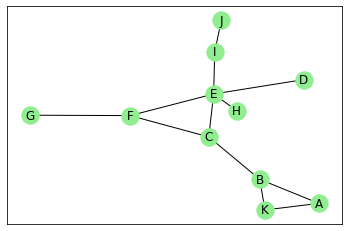

shortest path : ['A', 'B', 'C', 'E', 'H']
shortest path length : 4


In [1]:
# Import NetworkX and set matplotlib enable to print in ipython notebook
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Define of Graph Class
G = nx.Graph()

# add edges into graph.
Edge_list = [('A','B'),('A','K'),('B','C'),('B','K'),('C','F'),('C','E'),('F','G'),('E','F'),('E','H'),('E','D'),('E','I'),('I','J')]

for n1, n2, in Edge_list:
    G.add_edge(n1, n2)
    
# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# Drawing
nx.draw_networkx(G, pos, node_color='lightgreen')
plt.show()

# The distance between node A and H is 4
shortest_path = nx.shortest_path(G,'A','H') # it will return what nodes are on the path.
shortest_length = nx.shortest_path_length(G,'A','H') # it will return what nodes are on the path.


print(f'shortest path : {shortest_path}')
print(f'shortest path length : {shortest_length}')

<hr>

### Breadth-First Search : BFS

You may also want to find the distance from single node to every other node. <br>
**Easy to do manually in small networks but tedious in large (real) network.** so we can use Breadth-First Search

Breadth-First Search is a systematic and efficient procedure for computing distances from a node to all other nodes in a large network by "discovering" nodes in layer.

You can make bfs tree easily to search the paths and you can see the paths to search a specific node.<br>
```python
T = nx.bfs_tree(G, 'A')
T.edges() # it doesn't show edges by ordering of finding
```
> out : OutEdgeView([('A', 'B'), ('A', 'K'), ('B', 'C'), ('C', 'F'), ('C', 'E'), ('F', 'G'), ('E', 'H'), ('E', 'D'), ('E', 'I'), ('I', 'J')])

you can also get distances all other nodes between given root node as dictionary.

```python
nx.shortest_path_length(G,'A')
```
> out : {'A': 0, 'B': 1, 'K': 1, 'C': 2, 'F': 3, 'E': 3, 'G': 4, 'H': 4, 'D': 4, 'I': 4, 'J': 5}


All of the possible edges in Tree graph : [('A', 'B'), ('A', 'K'), ('B', 'C'), ('C', 'F'), ('C', 'E'), ('F', 'G'), ('E', 'H'), ('E', 'D'), ('E', 'I'), ('I', 'J')]
shortest_path_length from node "A" : {'A': 0, 'B': 1, 'K': 1, 'C': 2, 'F': 3, 'E': 3, 'G': 4, 'H': 4, 'D': 4, 'I': 4, 'J': 5}


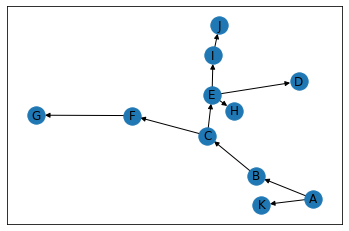

In [2]:
# make a graph to tree graph with setting root node 'A'
T = nx.bfs_tree(G,'A')
pos = nx.spring_layout(G, seed=201703)
nx.draw_networkx(T, pos)

root_shortest_path_len = nx.shortest_path_length(G,'A')

print(f'All of the possible edges in Tree graph : {T.edges()}')
print(f'shortest_path_length from node "A" : {root_shortest_path_len}')

<hr>

### Distance Measures

How can we characterize the distance between all pairs of nodes in a graph?

1. Average Distance : Between every shortest pair of nodes.

```python
nx.average_shortest_path_length(G)
```
> out : 2.5272727272727273

2. Diameter : maximum distance between any shortest pair of nodes.

```python
nx.diameter(G)
```
> out : 5

3. Eccentricity : the largest distance between given node and all other nodes.

```python
nx.eccentricity(G)
```
> out : {'A': 5, 'B': 4, 'K': 5, 'C': 3, 'F': 3, 'E': 3, 'G': 4, 'H': 4, 'D': 4, 'I': 4, 'J': 5}

4. Radius : minimum of all possible eccentricity of given graph.

```python
nx.radius(G)
```
> out : 3

5. Periphery : the set of nodes that have eccentircity equal to diameter

```python
nx.periphery(G)
```
> out : ['A', 'K', 'J']

6. Center : the set of nodes that have eccentricity equal to the radius (opposite to periphery) 

```python
nx.center(G)
```
> out : ['C', 'F', 'E']

<hr>

### Example : Karate Club Network

Let's try what we have just learned on the famous toy graph : **`Friendship network in a 34-person karate club`**

Average shortest path length : 2.408199643493761
Radius : 3
Diameter : 5


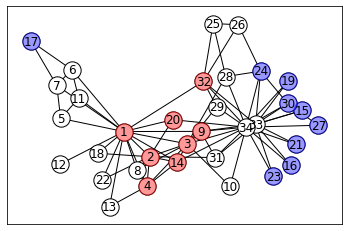

In [3]:
# This toy graph is so famous that "networkx" has it.
G = nx.karate_club_graph()

# Set start node number 1
G = nx.convert_node_labels_to_integers(G, first_label=1)

Avg_shortest_path_len = nx.average_shortest_path_length(G)
Radius = nx.radius(G)
Diameter = nx.diameter(G)
center_nodes = nx.center(G)
periphery_nodes = nx.periphery(G)

pos = nx.spring_layout(G, seed=201703) 
nx.draw_networkx(G,pos, node_color='white', edgecolors='black')
for n in center_nodes :
    nx.draw_networkx_nodes([n], pos, node_color='red', alpha=0.4)
for n in periphery_nodes :
    nx.draw_networkx_nodes([n], pos, node_color='blue', alpha=0.4)

print(f'Average shortest path length : {Avg_shortest_path_len}')
print(f'Radius : {Radius}')
print(f'Diameter : {Diameter}')
plt.show()

Node 34 is the assistant here, it seems pretty central. Why is 34 not showing up in the center?

node 34 has a distance four to node 17. To get from 34 to 17, you have to go 34, 32, 16, and 17, it couldn't be in the center **because the radius of the graph is three** and this one has a node that is the distance four away from it. If this node 17 was a distance three away from 34, then 34 would actually be in the center.



If you make a very small change to a graph that makes a particular node far further away from the other, you can sort of make it or break it for the node to be in the center or not.